In [49]:
import pandas as pd
import numpy as np

### Calculate the median GDP per capita

In [50]:
gdp = pd.read_csv('../../Processed Data/gdp.csv')

#### The FAO food consumption and depression dataset will intersect during the years 2014 - 2017. Therefore, we only select the years 2014 - 2017 in our GDP dataset.

In [51]:
gdp_14_17 = gdp[['Country Name', 'Country Code', '2014', '2015', '2016', '2017']].drop(gdp.loc[(gdp['2014'] == '..') | (gdp['2015'] == '..') | (gdp['2016'] == '..') | (gdp['2017'] == '..')].index)



c:\users\mfan2\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [52]:
# convert the values in GDP column to numbers
gdp_14_17['2014'] = pd.to_numeric(gdp_14_17['2014'])
gdp_14_17['2015'] = pd.to_numeric(gdp_14_17['2015'])
gdp_14_17['2016'] = pd.to_numeric(gdp_14_17['2016'])
gdp_14_17['2017'] = pd.to_numeric(gdp_14_17['2017'])

#### Find the mean GDP per capita across the 4 years

In [53]:
gdp_14_17['average_GDP_capita'] = gdp_14_17[['2014', '2015', '2016', '2017']].mean(axis=1)

In [54]:
gdp_14_17.head()

,Country Name,Country Code,2014,2015,2016,2017,average_GDP_capita
0,Afghanistan,AFG,613.856689,578.466353,509.218661,519.884773,555.356619
1,Albania,ALB,4578.631994,3952.801215,4124.055726,4531.020806,4296.627435
2,Algeria,DZA,5494.352336,4187.509727,3945.482081,4111.294110,4434.659564
3,Andorra,AND,41303.929371,35762.523074,37474.665406,38962.880354,38375.999551
4,Angola,AGO,5408.410496,4166.979684,3506.072885,4095.812942,4294.319002


#### Median of average GDP per capita for years 2014 - 2017

In [55]:
median_gdp = gdp_14_17['average_GDP_capita'].median()

In [56]:
median_gdp

6078.232316246892

### Split countries by above or below median GDP

In [57]:
gdp_filtered_above = gdp_14_17.loc[(gdp_14_17['average_GDP_capita'] >= median_gdp)].drop(columns=['2014', '2015', '2016', '2017'])
gdp_filtered_below = gdp_14_17.loc[(gdp_14_17['average_GDP_capita'] < median_gdp)].drop(columns=['2014', '2015', '2016', '2017'])

In [58]:
gdp_filtered_above

,Country Name,Country Code,average_GDP_capita
3,Andorra,AND,38375.999551
5,Antigua and Barbuda,ATG,14592.176681
6,Argentina,ARG,13381.785742
8,Australia,AUS,55816.402789
9,Austria,AUT,47149.721678
...,...,...,...
218,Other small states,OSS,13548.650262
220,Post-demographic dividend,PST,41971.328514
222,Small states,SST,12290.807761
228,Upper middle income,UMC,7990.031548


In [59]:
gdp_filtered_below

,Country Name,Country Code,average_GDP_capita
0,Afghanistan,AFG,555.356619
1,Albania,ALB,4296.627435
2,Algeria,DZA,4434.659564
4,Angola,AGO,4294.319002
7,Armenia,ARM,3774.964716
...,...,...,...
223,South Asia,SAS,1638.178406
224,South Asia (IDA & IBRD),TSA,1638.178406
225,Sub-Saharan Africa,SSF,1651.492786
226,Sub-Saharan Africa (excluding high income),SSA,1639.910145


### Find the average population over years 2014, 2015, 2016, 2017

In [60]:
country_population = pd.read_csv("../../Processed Data/country_population.csv")

In [61]:
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]

In [62]:
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)

### Read food consumption data from FAO

In [63]:
fao_consumption = pd.read_csv("../../Processed Data/FAO_Consumption.csv")

### Read the Depression dataset

In [64]:
depression = pd.read_csv("../../Processed Data/depression.csv")

In [65]:
fao_consumption_filtered = fao_consumption.loc[fao_consumption['Year'].isin(['2014', '2015', '2016', '2017'])]

In [66]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
5,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...
863,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
865,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
866,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
867,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [67]:
np.unique(list(fao_consumption_filtered['Country Name']))

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Gr

In [68]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]

### Merge FAO consumption and Depression datasets on Country and Year

In [69]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count
24,24,Afghanistan,2014,884404.683172
25,25,Afghanistan,2015,906133.433945
26,26,Afghanistan,2016,932188.730746
27,27,Afghanistan,2017,967281.203243
52,52,Albania,2014,68970.473430
...,...,...,...,...
6439,6439,Zambia,2017,438079.199268
6464,6464,Zimbabwe,2014,311665.769283
6465,6465,Zimbabwe,2015,320638.507158
6466,6466,Zimbabwe,2016,330437.353798


In [70]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
5,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...
863,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
865,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
866,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
867,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [71]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count
24,24,Afghanistan,2014,884404.683172
25,25,Afghanistan,2015,906133.433945
26,26,Afghanistan,2016,932188.730746
27,27,Afghanistan,2017,967281.203243
52,52,Albania,2014,68970.473430
...,...,...,...,...
6439,6439,Zambia,2017,438079.199268
6464,6464,Zimbabwe,2014,311665.769283
6465,6465,Zimbabwe,2015,320638.507158
6466,6466,Zimbabwe,2016,330437.353798


In [72]:
FAO_consumption_depression = depression_filtered.merge(fao_consumption_filtered, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [73]:
FAO_consumption_depression

,Unnamed: 0_x,Country Name,Year,Depression Count,Unnamed: 0_y,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,24.0,Afghanistan,2014,884404.683172,0,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,25.0,Afghanistan,2015,906133.433945,1,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,26.0,Afghanistan,2016,932188.730746,2,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,27.0,Afghanistan,2017,967281.203243,3,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
4,52.0,Albania,2014,68970.473430,5,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,NaN,Venezuela (Bolivarian Republic of),2017,NaN,848,7709.0,2801.0,2692.0,1607.71,2468.0,5471.00,58.0,1346.0
692,NaN,Viet Nam,2014,NaN,850,49173.0,584.0,7667.0,10024.64,21536.0,22921.81,32.0,1557.0
693,NaN,Viet Nam,2015,NaN,851,50291.0,747.0,7785.0,10982.66,20740.0,21898.50,-33.0,1661.0
694,NaN,Viet Nam,2016,NaN,852,53966.0,819.0,8047.0,11013.69,22355.0,20023.75,142.0,1801.0


In [74]:
FAO_consumption_depression = FAO_consumption_depression.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [75]:
FAO_consumption_depression_by_country = FAO_consumption_depression.groupby(['Country Name']).mean().reset_index().drop(columns=['Year'])

In [76]:
FAO_consumption_depression_by_country.columns

Index(['Country Name', 'Depression Count', 'GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption'],
      dtype='object')

In [77]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),NaN,7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50
170,Viet Nam,NaN,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00
171,Yemen,9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75
172,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00


In [78]:
consumption_columns = FAO_consumption_depression_by_country.drop(columns=['Country Name', 'Depression Count']).columns

### Total consumption for each country

In [79]:
FAO_consumption_depression_by_country['total'] = FAO_consumption_depression_by_country[consumption_columns].sum(axis=1)

In [80]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,total
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,15400.1525
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,4477.3700
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40260.4100
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,34180.4250
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,71.5075
...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),NaN,7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50,27321.9125
170,Viet Nam,NaN,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00,113184.1425
171,Yemen,9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,8929.4800
172,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,12522.2925


##### Get food consumption compositions

We divide the food group consumption by the total consumption to calculate the percentage.

In [81]:
FAO_consumption_depression_by_country["GBL_percentage"] = FAO_consumption_depression_by_country['GBL Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Dairy_percentage"] = FAO_consumption_depression_by_country['Dairy Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Fruits_percentage"] = FAO_consumption_depression_by_country['Fruits Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Meat_percentage"] = FAO_consumption_depression_by_country['Meat Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Vegetables_percentage"] = FAO_consumption_depression_by_country['Vegetables Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Confections_percentage"] = FAO_consumption_depression_by_country['Confections Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Caffeine_percentage"] = FAO_consumption_depression_by_country['Caffeine Consumption'].div(FAO_consumption_depression_by_country['total'])
FAO_consumption_depression_by_country["Alcohol_percentage"] = FAO_consumption_depression_by_country['Alcohol Consumption'].div(FAO_consumption_depression_by_country['total'])

In [82]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,total,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,15400.1525,0.550400,0.140486,0.073392,0.035139,0.151021,0.043831,0.005227,0.000503
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,4477.3700,0.262208,0.259862,0.135459,0.047152,0.227533,0.042213,0.001675,0.023898
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40260.4100,0.406268,0.098707,0.104942,0.036485,0.281325,0.062860,0.003688,0.005725
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,34180.4250,0.376919,0.008382,0.138661,0.042745,0.328880,0.047509,0.000512,0.056392
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,71.5075,0.139845,0.090900,0.213264,0.195889,0.118869,0.167815,0.000000,0.073419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),NaN,7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50,27321.9125,0.286327,0.129832,0.096919,0.081154,0.094512,0.243893,0.002672,0.064692
170,Viet Nam,NaN,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00,113184.1425,0.445142,0.006726,0.070023,0.096200,0.175862,0.190151,0.000859,0.015037
171,Yemen,9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,8929.4800,0.594883,0.039952,0.088499,0.071669,0.082004,0.120417,0.001708,0.000868
172,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,12522.2925,0.370320,0.032163,0.010821,0.043466,0.128451,0.372276,0.000659,0.041845


### Merge total population 

##### Change country name to match

In [83]:
# the country names are not the same from the FAO dataset to Depression dataset, therefore when we join by country,
# we need to change the country name

country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
 'Yemen': 'Yemen, Rep.'
}

In [84]:
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

In [85]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,total,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,15400.1525,0.550400,0.140486,0.073392,0.035139,0.151021,0.043831,0.005227,0.000503
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,4477.3700,0.262208,0.259862,0.135459,0.047152,0.227533,0.042213,0.001675,0.023898
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40260.4100,0.406268,0.098707,0.104942,0.036485,0.281325,0.062860,0.003688,0.005725
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,34180.4250,0.376919,0.008382,0.138661,0.042745,0.328880,0.047509,0.000512,0.056392
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,71.5075,0.139845,0.090900,0.213264,0.195889,0.118869,0.167815,0.000000,0.073419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),NaN,7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50,27321.9125,0.286327,0.129832,0.096919,0.081154,0.094512,0.243893,0.002672,0.064692
170,Viet Nam,NaN,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00,113184.1425,0.445142,0.006726,0.070023,0.096200,0.175862,0.190151,0.000859,0.015037
171,Yemen,9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,8929.4800,0.594883,0.039952,0.088499,0.071669,0.082004,0.120417,0.001708,0.000868
172,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,12522.2925,0.370320,0.032163,0.010821,0.043466,0.128451,0.372276,0.000659,0.041845


In [86]:
# change the country name to m atch
FAO_consumption_depression_by_country['Country Name'] = FAO_consumption_depression_by_country['Country Name'].apply(change_to_match_name)

In [87]:
# join the food consumption + depression and country population dataset
FAO_consumption_depression_by_country_w_population = pd.merge(FAO_consumption_depression_by_country, country_population[['Country Name', 'average']], left_on=['Country Name'], right_on=['Country Name'], how='left').dropna().drop_duplicates(subset=['Country Name'])

In [88]:
FAO_consumption_depression_by_country_w_population 

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,total,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage,average
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,15400.1525,0.550400,0.140486,0.073392,0.035139,0.151021,0.043831,0.005227,0.000503,34865981.25
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,4477.3700,0.262208,0.259862,0.135459,0.047152,0.227533,0.042213,0.001675,0.023898,2879841.25
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40260.4100,0.406268,0.098707,0.104942,0.036485,0.281325,0.062860,0.003688,0.005725,40148078.50
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,34180.4250,0.376919,0.008382,0.138661,0.042745,0.328880,0.047509,0.000512,0.056392,28371348.00
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,71.5075,0.139845,0.090900,0.213264,0.195889,0.118869,0.167815,0.000000,0.073419,94020.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Uzbekistan,8.177183e+05,11405.00,9304.75,3493.25,1721.8775,11463.75,1089.5100,29.00,384.00,38891.1375,0.293254,0.239251,0.089821,0.044274,0.294765,0.028014,0.000746,0.009874,31573275.00
169,Vanuatu,7.010900e+03,29.25,5.00,350.75,31.8900,70.25,14.7500,0.00,0.00,501.8900,0.058280,0.009962,0.698858,0.063540,0.139971,0.029389,0.000000,0.000000,274714.50
172,"Yemen, Rep.",9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,8929.4800,0.594883,0.039952,0.088499,0.071669,0.082004,0.120417,0.001708,0.000868,26831101.25
174,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,12522.2925,0.370320,0.032163,0.010821,0.043466,0.128451,0.372276,0.000659,0.041845,16124077.25


### Normalization by population

In [89]:
normalized_values = FAO_consumption_depression_by_country_w_population[['Depression Count',
 'GBL Consumption',
 'Dairy Consumption',
 'Fruits Consumption',
 'Meat Consumption',
 'Vegetables Consumption',
 'Confections Consumption',
 'Caffeine Consumption',
 'Alcohol Consumption']].div(FAO_consumption_depression_by_country_w_population['average'], axis=0)

In [90]:
normalized_values

,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0.026459,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07
1,0.024064,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05
2,0.033928,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06
3,0.027714,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05
4,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05
...,...,...,...,...,...,...,...,...,...
168,0.025899,0.000361,0.000295,0.000111,0.000055,0.000363,0.000035,9.184983e-07,1.216218e-05
169,0.025521,0.000106,0.000018,0.001277,0.000116,0.000256,0.000054,0.000000e+00,0.000000e+00
172,0.034032,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07
174,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05


###### Update the columns with the normalized values.

In [91]:
FAO_consumption_depression_by_country_w_population.update(normalized_values)

In [92]:
FAO_consumption_depression_by_country_w_population

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,total,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage,average
0,Afghanistan,0.026459,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07,15400.1525,0.550400,0.140486,0.073392,0.035139,0.151021,0.043831,0.005227,0.000503,34865981.25
1,Albania,0.024064,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05,4477.3700,0.262208,0.259862,0.135459,0.047152,0.227533,0.042213,0.001675,0.023898,2879841.25
2,Algeria,0.033928,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06,40260.4100,0.406268,0.098707,0.104942,0.036485,0.281325,0.062860,0.003688,0.005725,40148078.50
3,Angola,0.027714,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05,34180.4250,0.376919,0.008382,0.138661,0.042745,0.328880,0.047509,0.000512,0.056392,28371348.00
4,Antigua and Barbuda,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05,71.5075,0.139845,0.090900,0.213264,0.195889,0.118869,0.167815,0.000000,0.073419,94020.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Uzbekistan,0.025899,0.000361,0.000295,0.000111,0.000055,0.000363,0.000035,9.184983e-07,1.216218e-05,38891.1375,0.293254,0.239251,0.089821,0.044274,0.294765,0.028014,0.000746,0.009874,31573275.00
169,Vanuatu,0.025521,0.000106,0.000018,0.001277,0.000116,0.000256,0.000054,0.000000e+00,0.000000e+00,501.8900,0.058280,0.009962,0.698858,0.063540,0.139971,0.029389,0.000000,0.000000,274714.50
172,"Yemen, Rep.",0.034032,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07,8929.4800,0.594883,0.039952,0.088499,0.071669,0.082004,0.120417,0.001708,0.000868,26831101.25
174,Zambia,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05,12522.2925,0.370320,0.032163,0.010821,0.043466,0.128451,0.372276,0.000659,0.041845,16124077.25


### Perform correlation analysis for countries above the median GDP per capita

In [93]:
gdp_filtered_above

,Country Name,Country Code,average_GDP_capita
3,Andorra,AND,38375.999551
5,Antigua and Barbuda,ATG,14592.176681
6,Argentina,ARG,13381.785742
8,Australia,AUS,55816.402789
9,Austria,AUT,47149.721678
...,...,...,...
218,Other small states,OSS,13548.650262
220,Post-demographic dividend,PST,41971.328514
222,Small states,SST,12290.807761
228,Upper middle income,UMC,7990.031548


In [94]:
FAO_above_gdp = pd.merge(FAO_consumption_depression_by_country_w_population, gdp_filtered_above, left_on=['Country Name'], right_on=['Country Name'])

In [95]:
# rename Depression Count to Depression Rate - more accurate name
FAO_above_gdp = FAO_above_gdp.rename(columns={'Depression Count': 'Depression Rate'})

In [96]:
# Export data
FAO_above_gdp.to_csv("../../Processed Data/FAO_Depression.csv")

In [97]:
FAO_above_gdp

,Country Name,Depression Rate,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,...,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage,average,Country Code,average_GDP_capita
0,Antigua and Barbuda,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,0.000056,...,0.090900,0.213264,0.195889,0.118869,0.167815,0.000000,0.073419,94020.25,ATG,14592.176681
1,Argentina,0.035681,0.001808,0.000216,0.000110,0.000152,0.000122,0.000568,6.659492e-06,0.000071,...,0.070874,0.036052,0.049676,0.039966,0.185945,0.002180,0.023309,43359161.25,ARG,13381.785742
2,Australia,0.044393,0.000660,0.000355,0.000136,0.000178,0.000133,0.001484,7.847264e-06,0.000111,...,0.115937,0.044413,0.057938,0.043424,0.484108,0.002560,0.036300,24021112.00,AUS,55816.402789
3,Austria,0.036770,0.000724,0.000354,0.000122,0.000126,0.000185,0.000585,8.092551e-06,0.000138,...,0.158124,0.054305,0.056380,0.082428,0.260853,0.003610,0.061461,8680822.25,AUT,47149.721678
4,"Bahamas, The",0.026317,0.000097,0.000032,0.000160,0.000140,0.000113,0.000265,3.323295e-06,0.000056,...,0.036803,0.184017,0.161958,0.130345,0.305928,0.003834,0.065173,376132.75,BHS,31389.100265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Thailand,0.037242,0.000678,0.000017,0.000114,0.000071,0.000135,0.001481,5.230003e-07,0.000048,...,0.006701,0.044880,0.027808,0.053137,0.582161,0.000206,0.018687,68833607.50,THA,6094.769151
65,Trinidad and Tobago,0.035681,0.000236,0.000031,0.000074,0.000110,0.000074,0.000100,7.280264e-07,0.000030,...,0.046692,0.113674,0.167304,0.113118,0.152876,0.001112,0.045581,1373576.50,TTO,17743.926068
66,Turkey,0.037628,0.000571,0.000242,0.000144,0.000063,0.000266,0.000292,3.931352e-06,0.000015,...,0.151602,0.090258,0.039249,0.166414,0.183019,0.002462,0.009635,79171233.00,TUR,11162.595190
67,United Arab Emirates,0.034187,0.000470,0.000062,0.000124,0.000132,0.000175,0.000185,7.260499e-06,0.000024,...,0.052203,0.104928,0.111674,0.148355,0.156875,0.006162,0.020599,9331314.50,ARE,40300.468374


In [98]:
FAO_above_gdp.columns

Index(['Country Name', 'Depression Rate', 'GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption', 'total',
       'GBL_percentage', 'Dairy_percentage', 'Fruits_percentage',
       'Meat_percentage', 'Vegetables_percentage', 'Confections_percentage',
       'Caffeine_percentage', 'Alcohol_percentage', 'average', 'Country Code',
       'average_GDP_capita'],
      dtype='object')

### Pairwise scatter plots - consumption percentage (i.e., percentage of a food group consumed out of total food consumed)

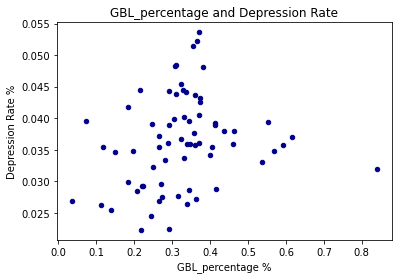

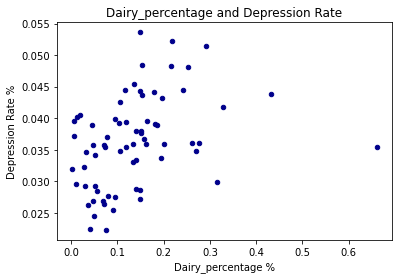

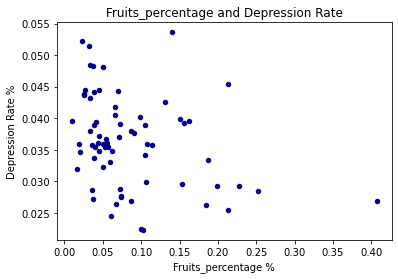

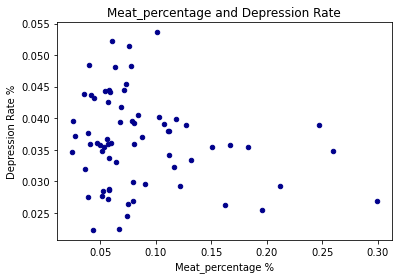

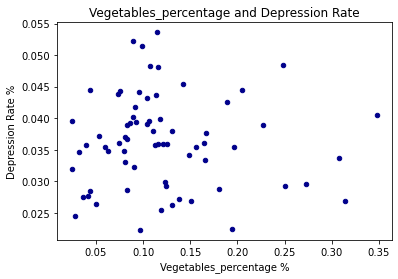

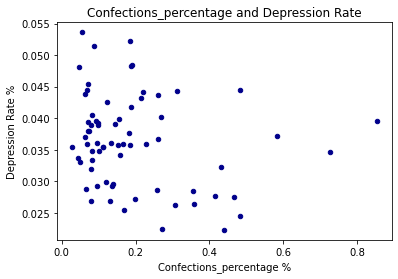

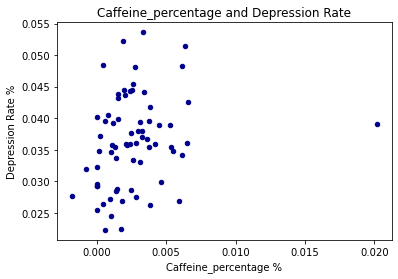

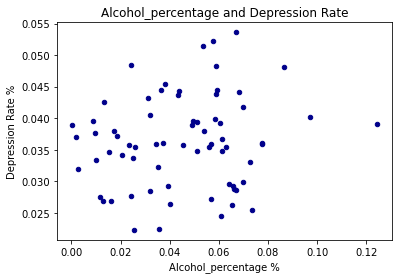

In [99]:
for column in ['GBL_percentage',
 'Dairy_percentage',
 'Fruits_percentage',
 'Meat_percentage',
 'Vegetables_percentage',
 'Confections_percentage',
 'Caffeine_percentage',
 'Alcohol_percentage']:
    
    ax1 = FAO_above_gdp.plot.scatter(x=column,
                          y='Depression Rate',
                          c='DarkBlue')
    
    ax1.title.set_text(f'{column} and Depression Rate')
    ax1.set_xlabel(f'{column} %')
    ax1.set_ylabel("Depression Rate %")
    
    fig = ax1.get_figure()
    
    # Uncomment to save figure
    # fig.savefig(f'images/{column}_above.png')

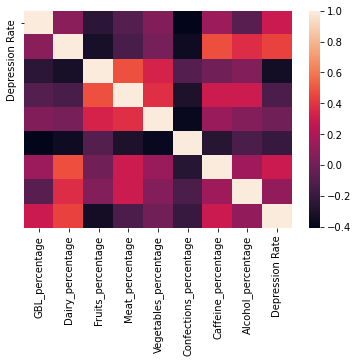

In [100]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = FAO_above_gdp[['GBL_percentage',
 'Dairy_percentage',
 'Fruits_percentage',
 'Meat_percentage',
 'Vegetables_percentage',
 'Confections_percentage',
 'Caffeine_percentage',
 'Alcohol_percentage', 'Depression Rate', 'Country Name']].groupby(['Country Name']).sum().reset_index().corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Depression Rate'])

In [101]:
corr.loc['Depression Rate']

GBL_percentage            0.290026
Dairy_percentage          0.449032
Fruits_percentage        -0.340519
Meat_percentage          -0.125137
Vegetables_percentage    -0.003033
Confections_percentage   -0.204896
Caffeine_percentage       0.290886
Alcohol_percentage        0.103690
Depression Rate           1.000000
Name: Depression Rate, dtype: float64